**Import Required Libraries and Read the Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/shasingh74/Downloads/wine+quality/winequality-red.csv',sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Descriptive Statistics

In [3]:
#Statistical Analysis:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
#datatype information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# DATA PREPROCESSING

In [5]:
df.columns.tolist()


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

<Axes: >

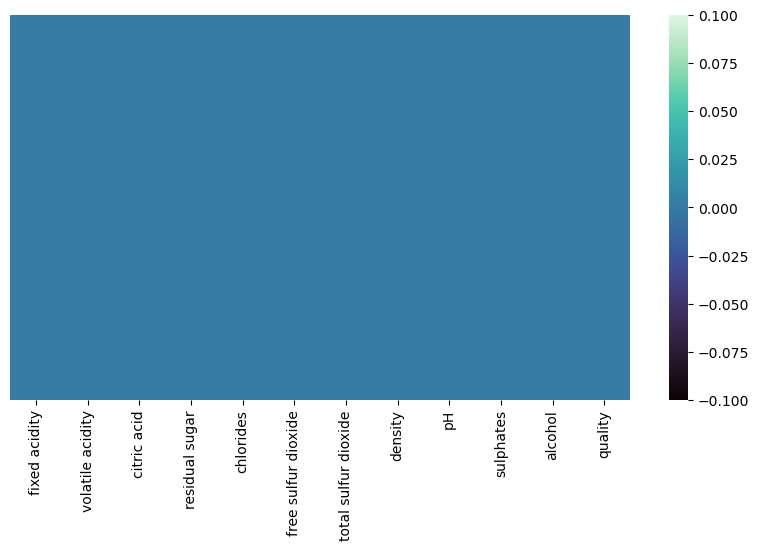

In [6]:
#check for missing values:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='mako')

In [7]:
#check for missing values:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EXPLORATORY DATA ANALYSIS

<Axes: xlabel='quality', ylabel='count'>

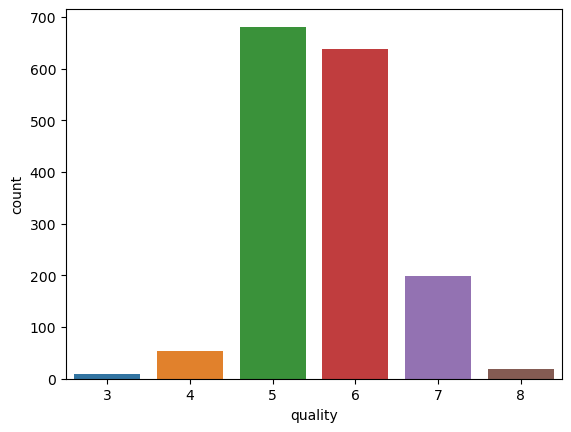

In [8]:
#count plot of quality variable:

sns.countplot(x='quality',data=df)

* here we can see that we have average wine simple data
* Now we going to plot swarmplot to see data distribution

<Axes: xlabel='quality', ylabel='alcohol'>

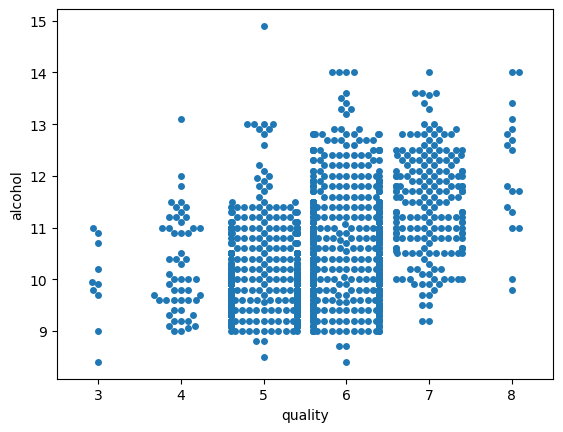

In [9]:
sns.swarmplot(x="quality",y="alcohol",data=df)

<Axes: xlabel='quality', ylabel='density'>

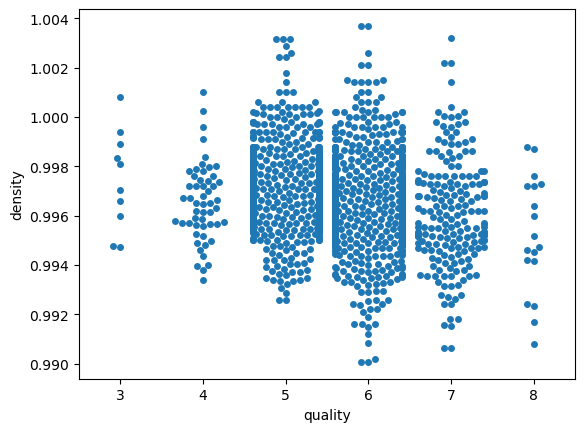

In [10]:
sns.swarmplot(x="quality",y="density",data=df)

<Axes: xlabel='quality', ylabel='density'>

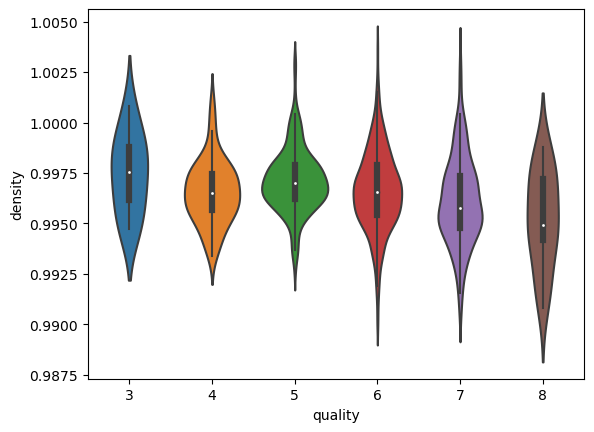

In [11]:
sns.violinplot(x="quality",y="density",data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

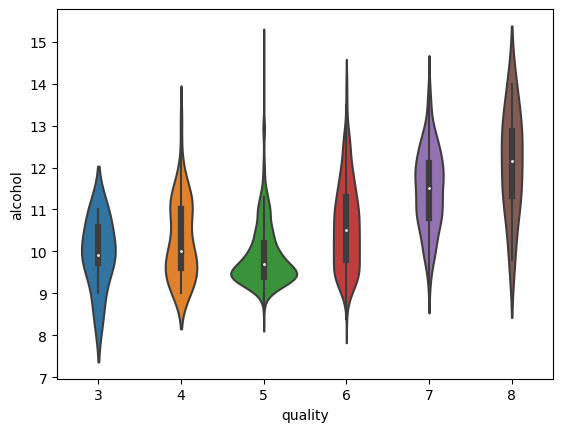

In [12]:
sns.violinplot(x="quality",y="alcohol",data=df)

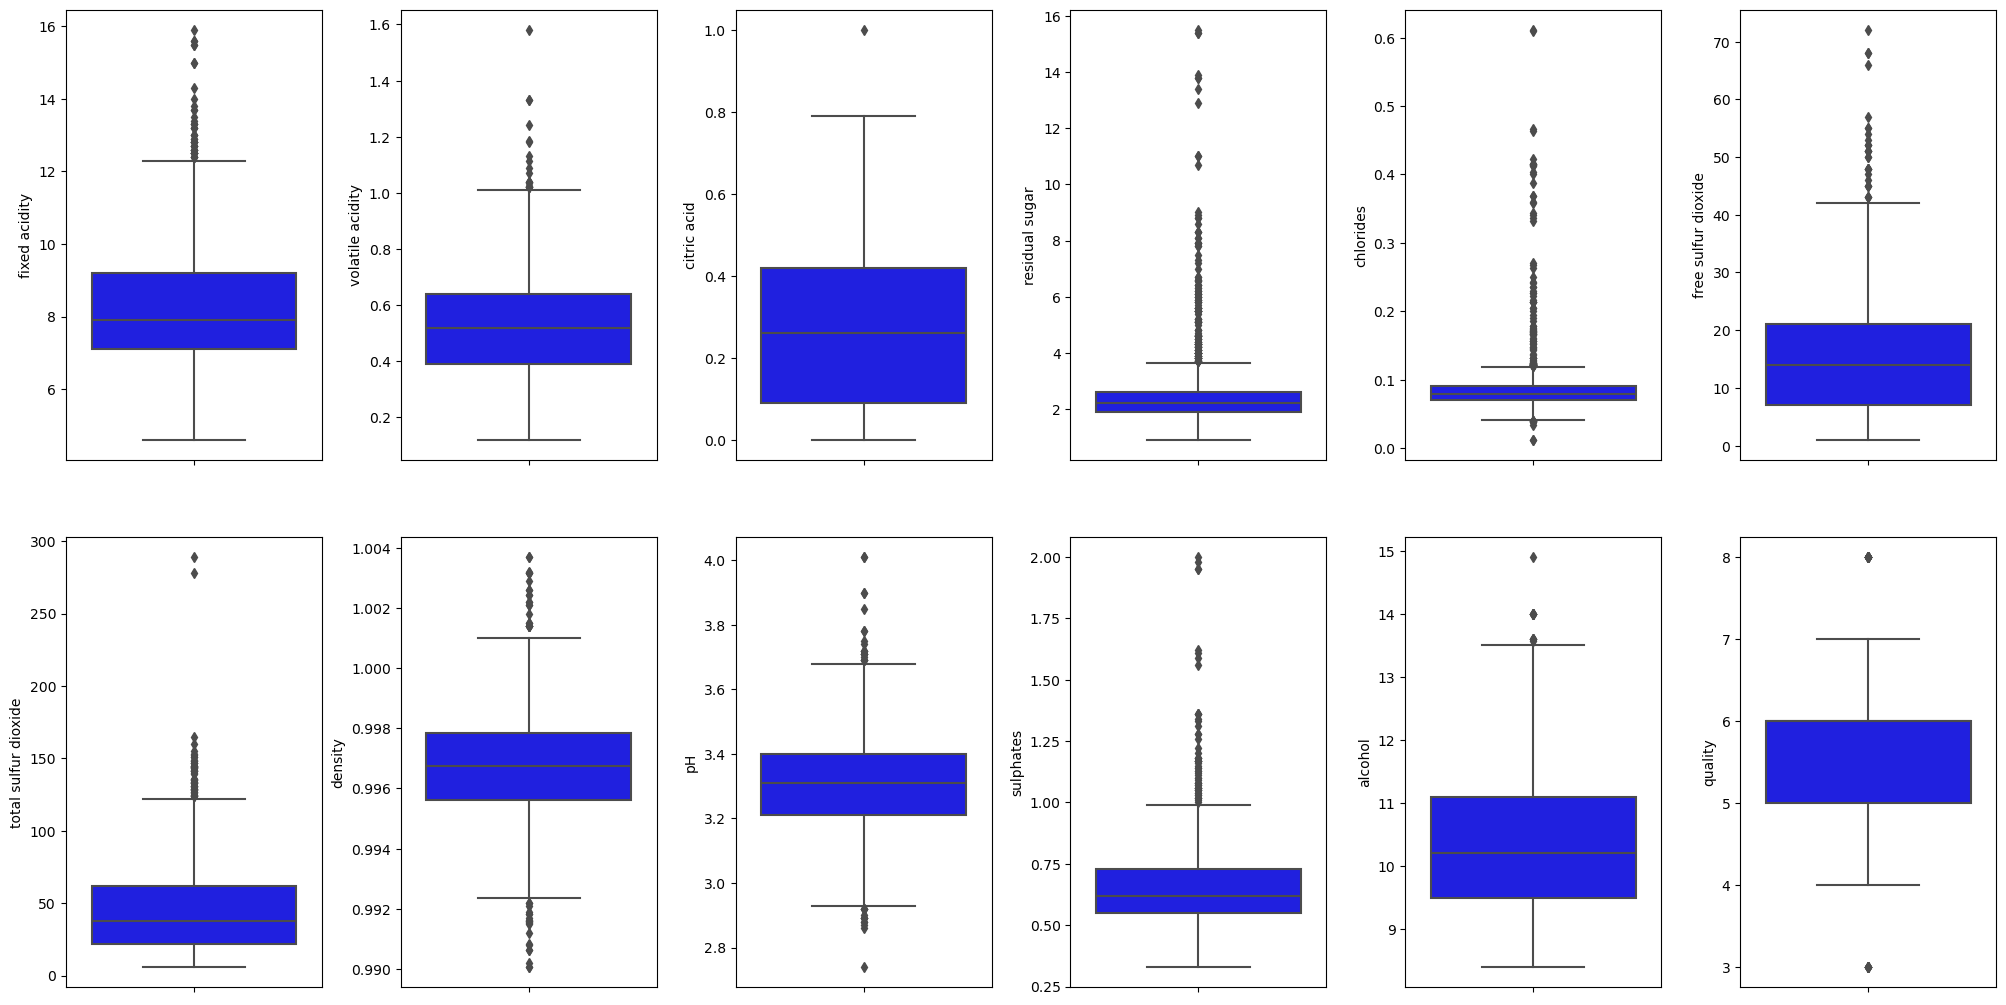

In [13]:
#lets see whether our data has outliers or not:

# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

* by the above plot we can see three is lots of otliers 
* so we gonn remove them

In [14]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(df)

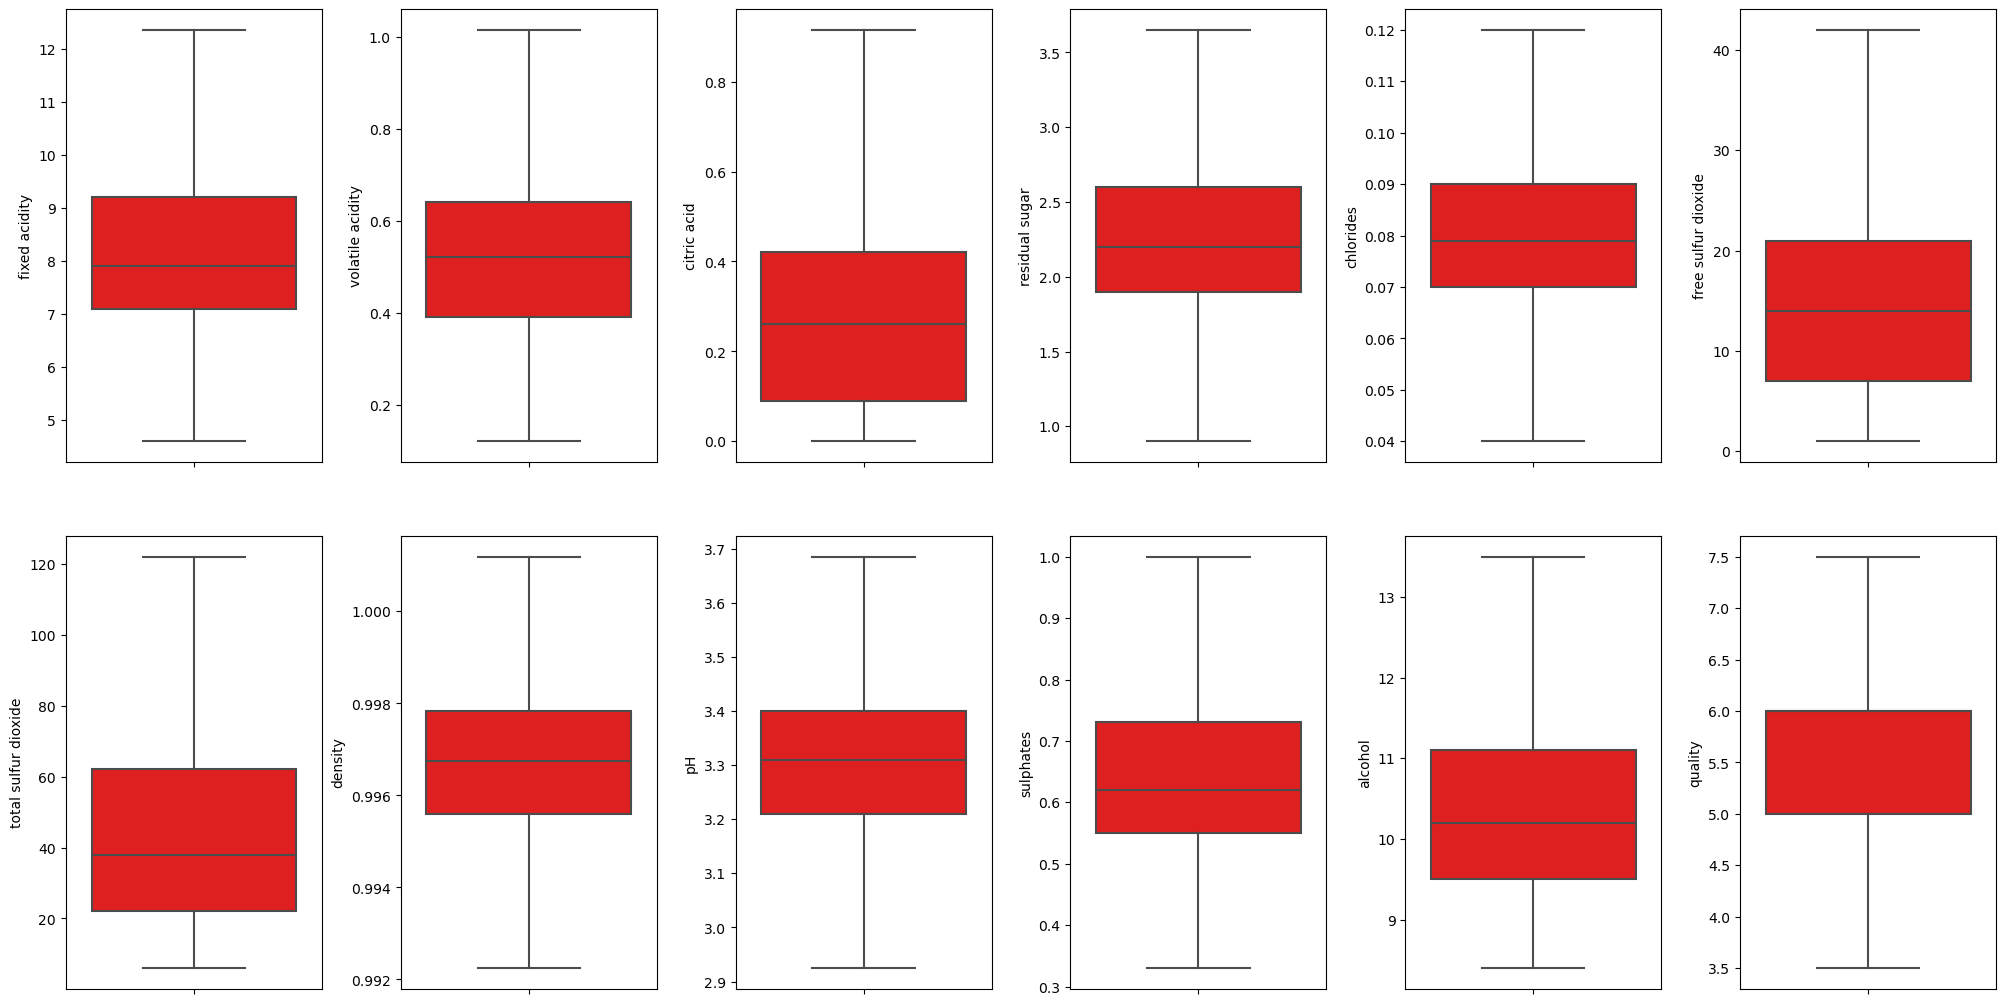

In [15]:
#lets see whether our data has outliers or not:

# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

* Now you can see all outliers removed

## FIND CORRELATED COLUMNS:

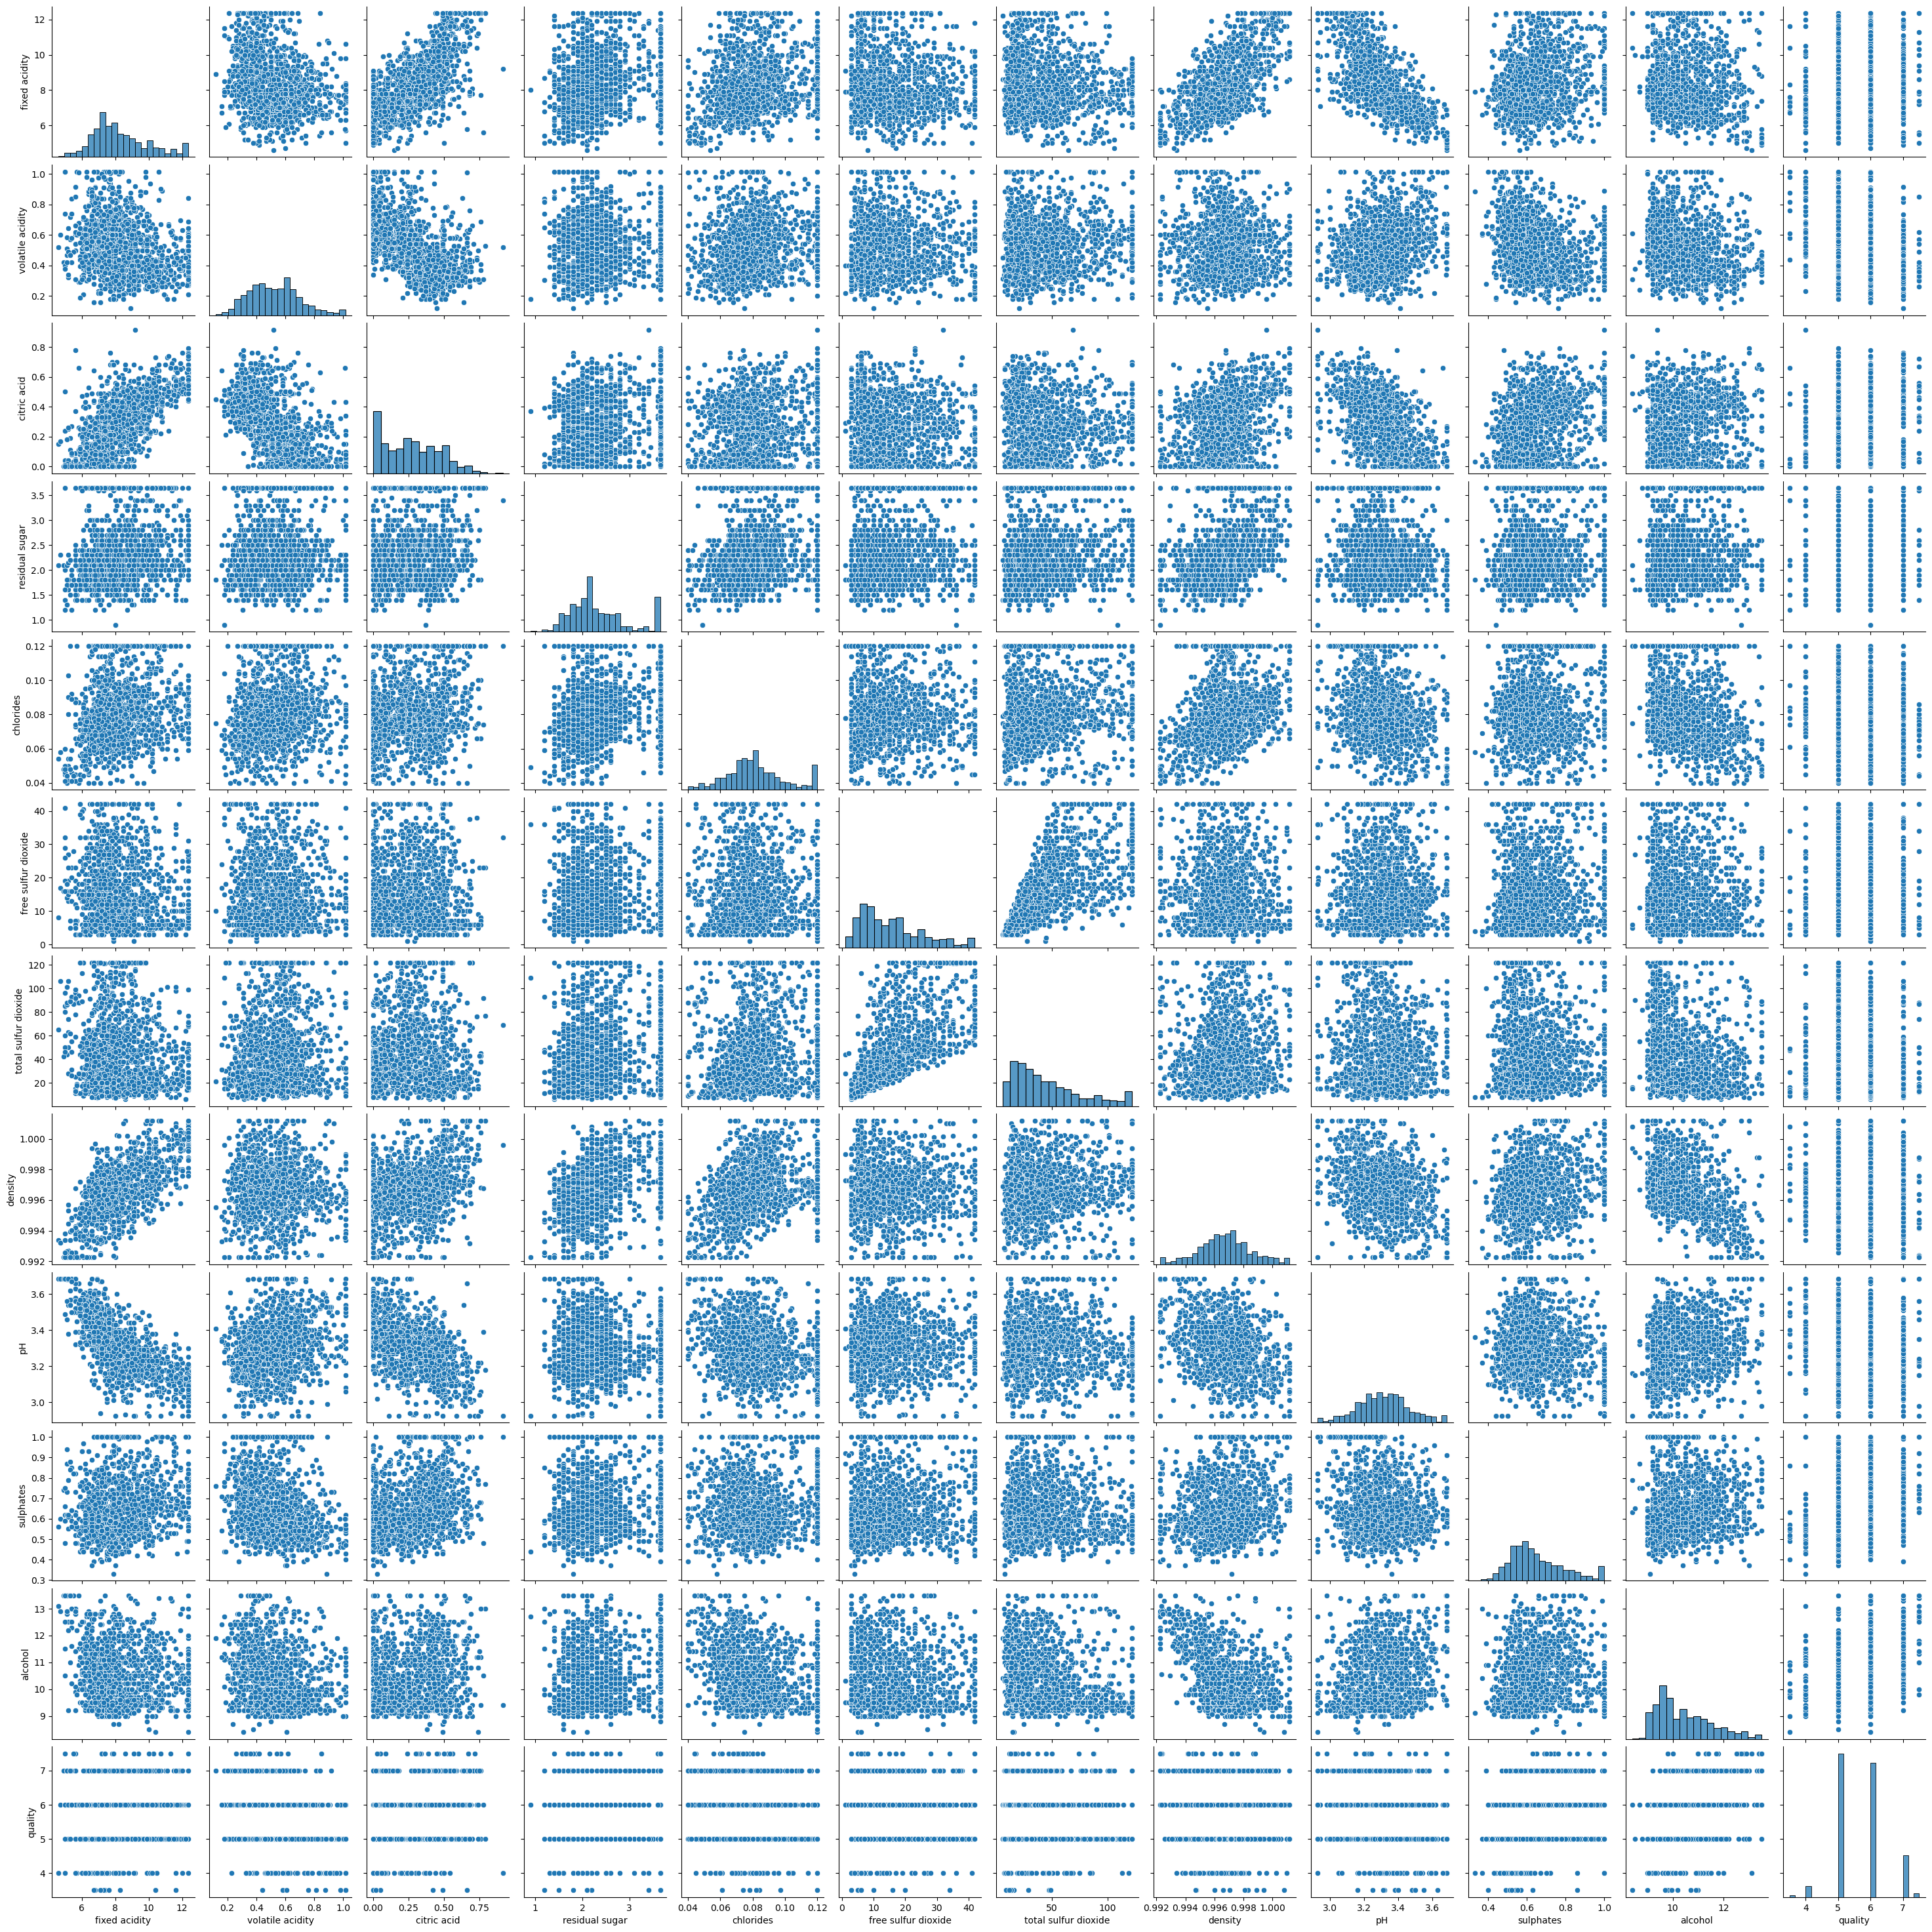

In [16]:
#Method 1
sns.pairplot(df)

<Axes: >

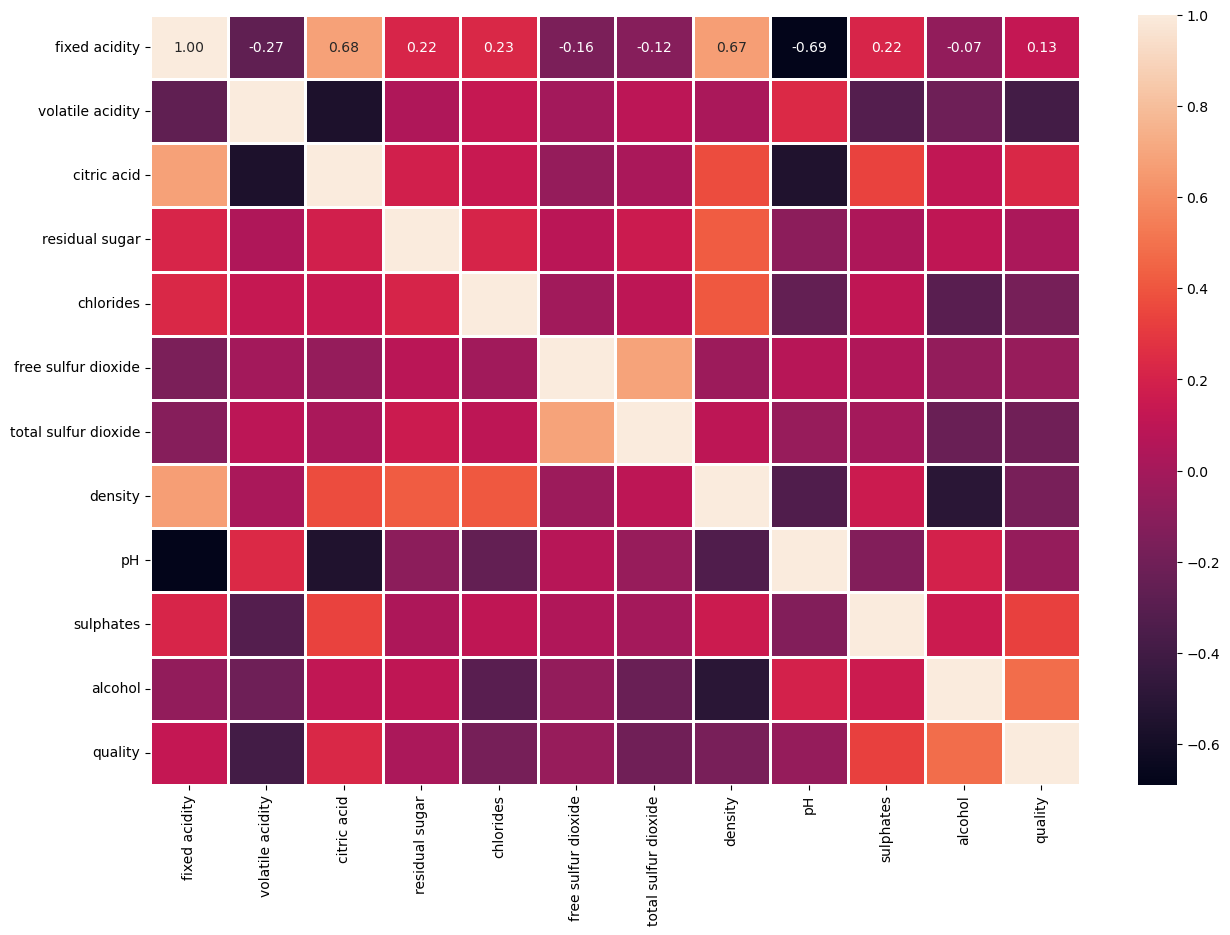

In [17]:
#Method 2
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)


<h1 style="font-size:160%;">Insights From Above Figure:</h1>

<ul>
    <li style="font-size:130%;">Alcohol is positively correlated with the quality of the red wine.</li>
    <li style="font-size:130%;">Alcohol has a weak positive correlation with the pH value.</li>
    <li style="font-size:130%;">Citric acid and density have a strong positive correlation with fixed acidity.</li>
    <li style="font-size:130%;">pH has a negative correlation with density, fixed acidity, citric acid, and sulfates.</li>
</ul>

<Axes: xlabel='alcohol', ylabel='Density'>

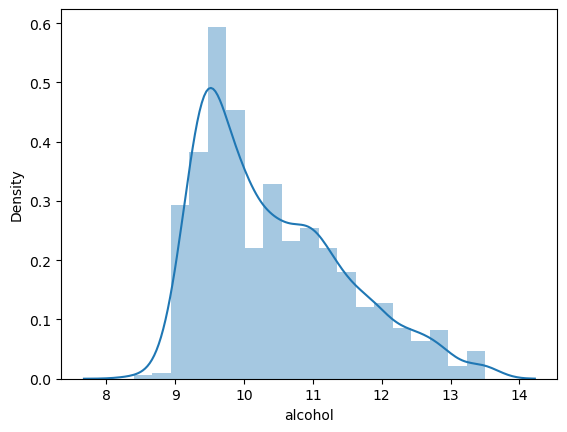

In [18]:
# Lets see how alcohol concentration is distributed 
#with respect to the quality of the red wine.
sns.distplot(df['alcohol'])

* <p style="font-size:150%;">we can see that alcohol distribution is positively skewed with the quality of the red wine. We can verify this using the skew method from scipy.stats. Check the snippet given here:</p>

In [19]:
from scipy.stats import skew
skew(df['alcohol'])

0.7946828280435413

* <p style="font-size:150%;">The output verifies that alcohol is positively skewed. That gives deeper insight into the alcohol column.</p>


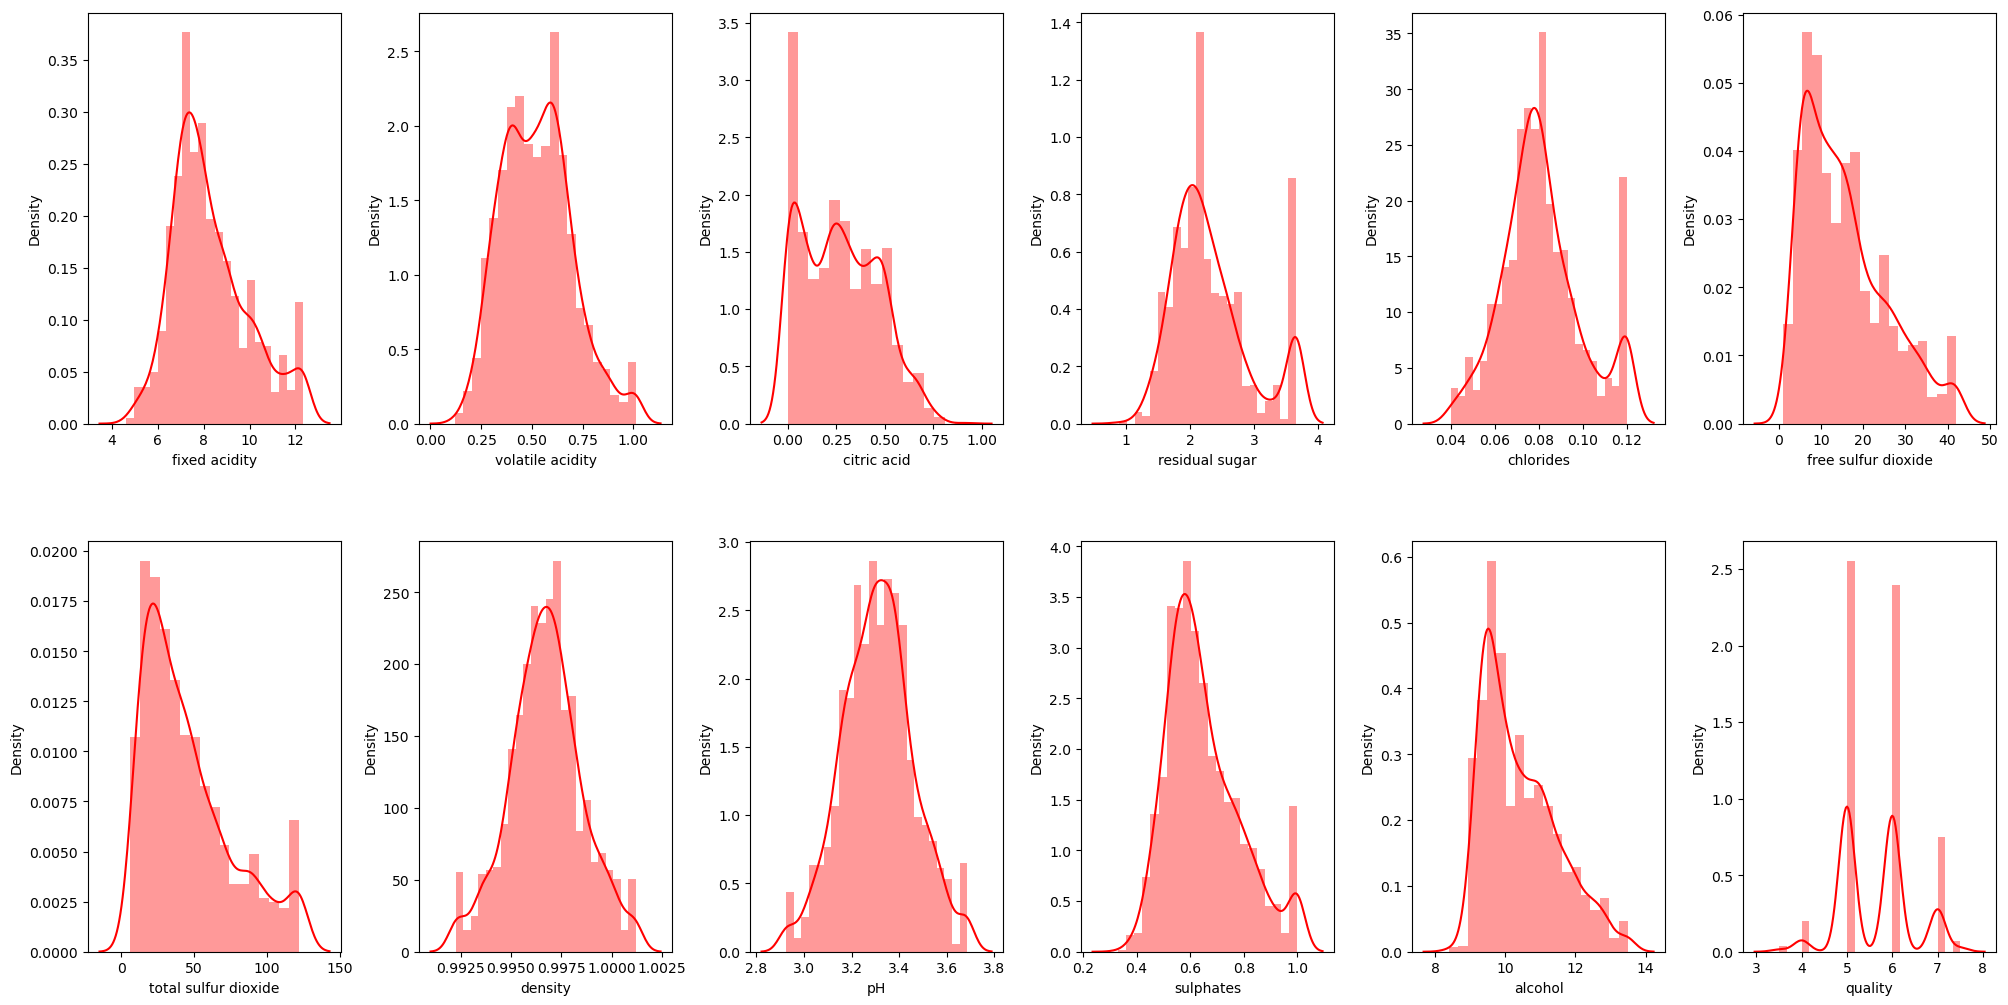

In [20]:
#Dist plot of all features:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

* <p style="font-size:150%;">The above figures show the distribution of the features. Few of them are normally distributed where other are rightly skewed. The range of each feature is also not huge.</p>

## Alcohol Vs Quality:

<Axes: xlabel='quality', ylabel='alcohol'>

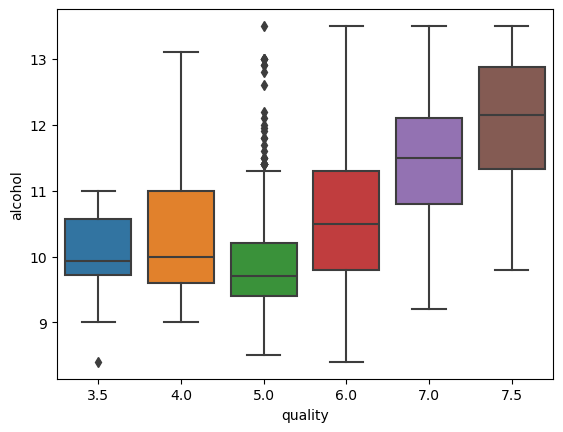

In [21]:
sns.boxplot(x='quality', y='alcohol', data = df)

* <p style="font-size:150%;">In above Figure - showing some dots outside of the graph. Those are outliers. Most of the outliers as shown in Figure 12.7 are around wine with quality 5 and 6. We can remove the outliers by passing an argument, showoutliers=False</p>


<Axes: xlabel='quality', ylabel='alcohol'>

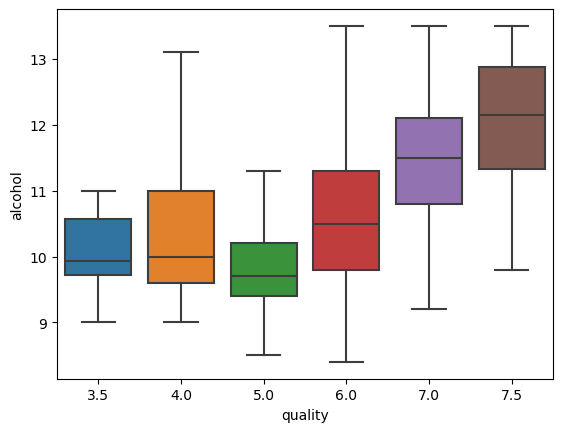

In [22]:
sns.boxplot(x='quality', y='alcohol', data = df, showfliers=False)

* <p style="font-size:150%;">The higher the alcohol concentration is, the higher the quality of the wine.</p>

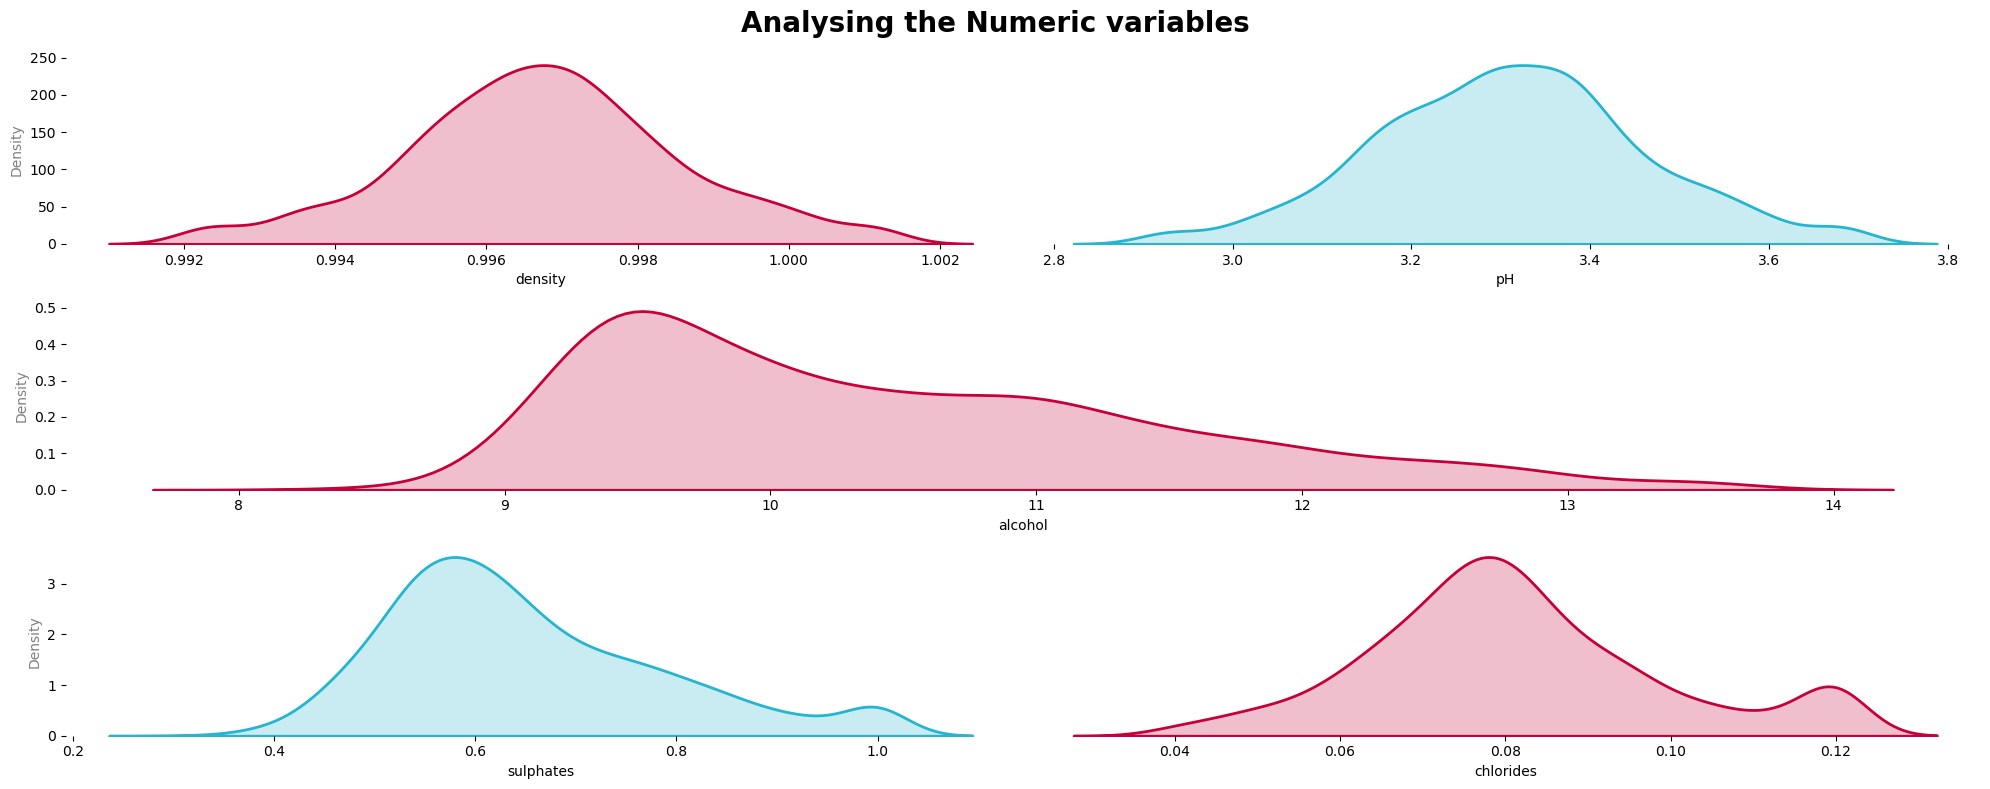

In [23]:
#integer columns
colors = ['#C70039','#25B5CE']
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(df['density'], ax=ax['A'], color=colors[0], fill=True, linewidth=2)
sns.kdeplot(df['pH'], ax=ax['B'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df['alcohol'], ax=ax['C'], color=colors[0],fill=True, linewidth=2)
sns.kdeplot(df['sulphates'], ax=ax['D'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df['chlorides'], ax=ax['E'], color=colors[0],fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

## Alcohol versus pH

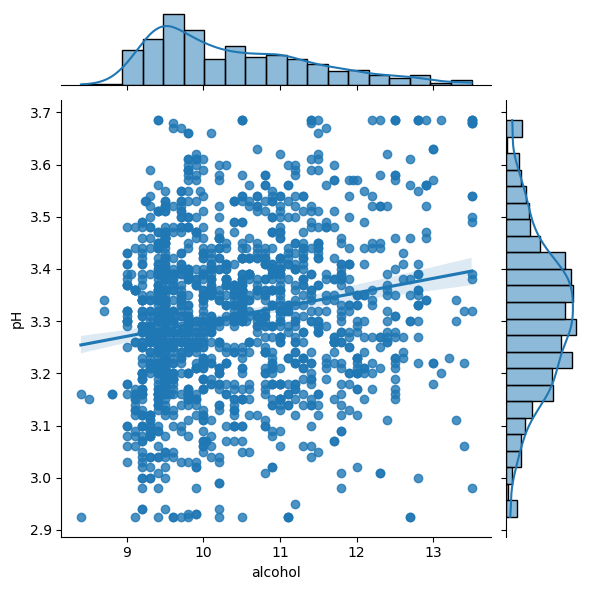

In [24]:
sns.jointplot(x='alcohol',y='pH',data=df, kind='reg')

* <p style="font-size:150%;">This Figure shows that alcohol is weakly positively related to the pH values. Moreover, the regression line is depicted in the figure, illustrating the correlation between them.</p>

* <p style="font-size:150%;">We can quantify the correlation using Pearson regression from scipy.stats, as shown here:</p>

In [25]:
from scipy.stats import pearsonr
def get_correlation(column1, column2, df):
    pearson_corr, p_value = pearsonr(df[column1], df[column2])
    print("Correlation between {} and {} is {}".format(column1,column2, pearson_corr))
    print("P-value of this correlation is {}".format(p_value))

In [26]:
get_correlation('alcohol','pH', df)

Correlation between alcohol and pH is 0.19519615255971773
P-value of this correlation is 3.402775483823699e-15


# MODEL DEVELOPMENT AND EVALUATION

In [27]:
#Import Model libraries:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

### HANDLING IMBALANCED DATA

In [28]:
X = df.drop('quality', axis=1)
y = df['quality']

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create output classes 
WineQuality = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        WineQuality.append('Bad')
    elif i >= 4 and i <= 7:
        WineQuality.append('Average')
    elif i >= 8 and i <= 10:
        WineQuality.append('Good')
    else:
        WineQuality.append('None')
df['WineQuality'] = WineQuality

# Encode the categorical labels
le = LabelEncoder()
y = le.fit_transform(df['WineQuality'])

In [30]:
pd.Series(y).unique()

array([0, 1])

In [31]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [32]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# train the model
model = RandomForestClassifier()
model.fit(x_train, y_train)
print("Accuracy:", model.score(x_test, y_test) * 100)

# cross-validation
score = cross_val_score(model, X, y, cv=5)
print("CV Score:", np.mean(score)*100)

Accuracy: 99.36386768447836
CV Score: 98.09033649610643


In [33]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       417
           1       0.99      0.99      0.99       369

    accuracy                           0.99       786
   macro avg       0.99      0.99      0.99       786
weighted avg       0.99      0.99      0.99       786



In [34]:
import joblib

joblib.dump(model,"RandomForest.pkl", protocol =2)

['RandomForest.pkl']

In [35]:
joblib.dump(x_test.columns, "model_columns.pkl", protocol =2)

['model_columns.pkl']

In [36]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,